In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel(r"C:\Users\CTTC\Downloads\energy+efficiency\ENB2012_data.xlsx")

In [4]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
data.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [8]:
for i in data.columns:
    print(i,':','\n',data[i].unique())

X1 : 
 [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
X2 : 
 [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
X3 : 
 [294.  318.5 343.  416.5 245.  269.5 367.5]
X4 : 
 [110.25 122.5  147.   220.5 ]
X5 : 
 [7.  3.5]
X6 : 
 [2 3 4 5]
X7 : 
 [0.   0.1  0.25 0.4 ]
X8 : 
 [0 1 2 3 4 5]
Y1 : 
 [15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37
 25.27  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96
 32.12  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42
 15.21  12.96  12.97  12.93  13.02  24.29  24.31  24.13  24.25  28.88
 29.68  28.83  27.9   26.48  27.02  26.33 

<Axes: >

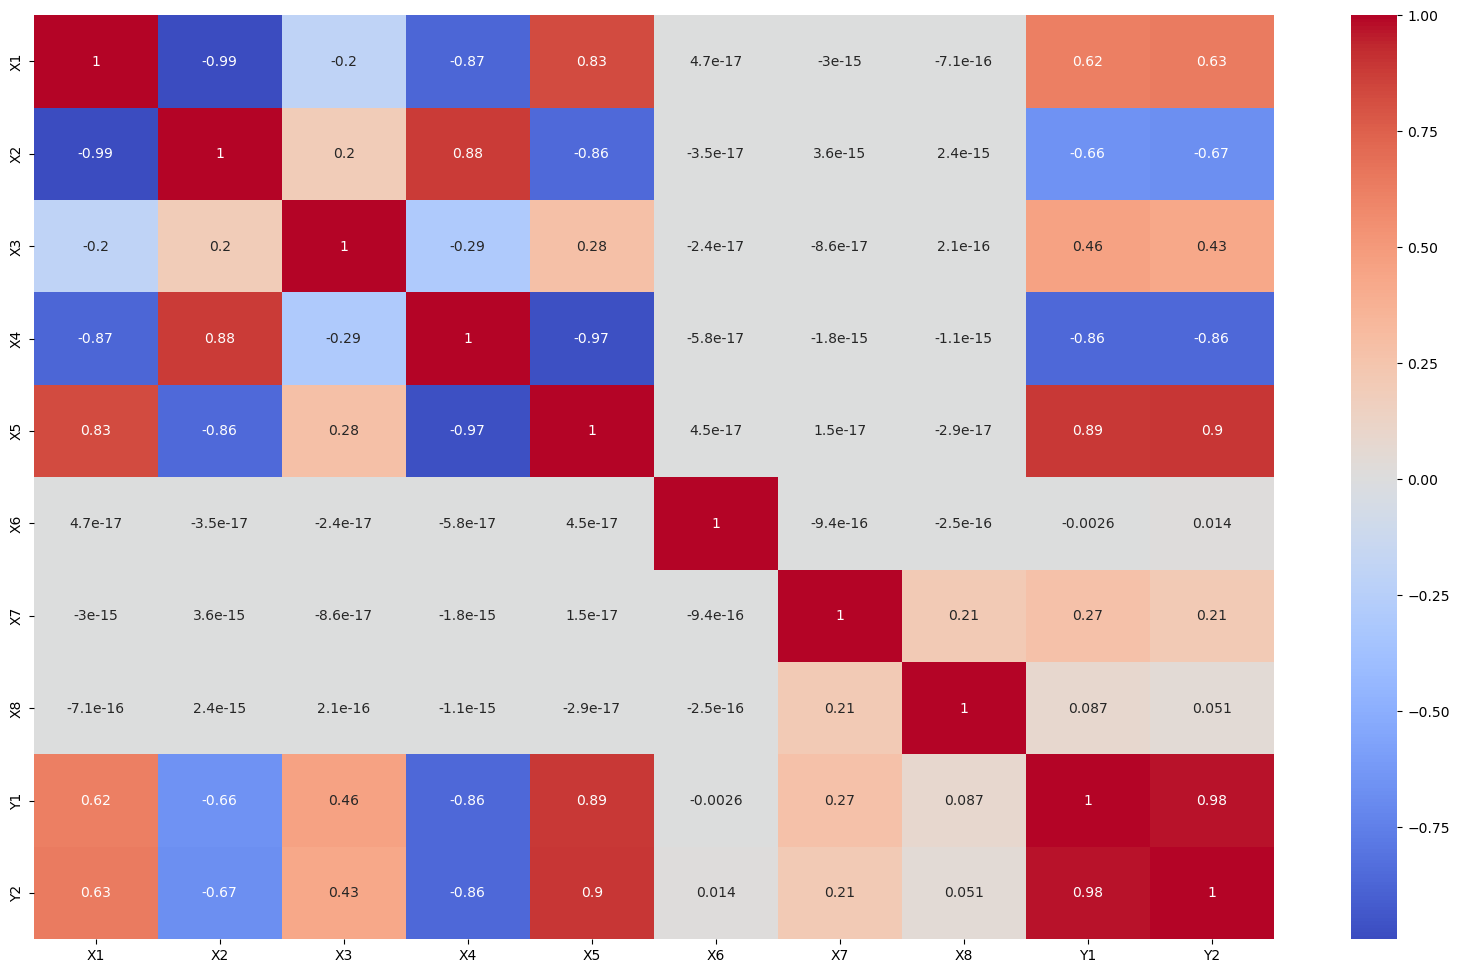

In [13]:
plt.figure(figsize=(20,12))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')

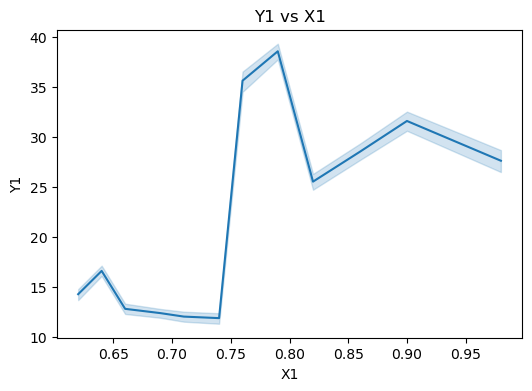

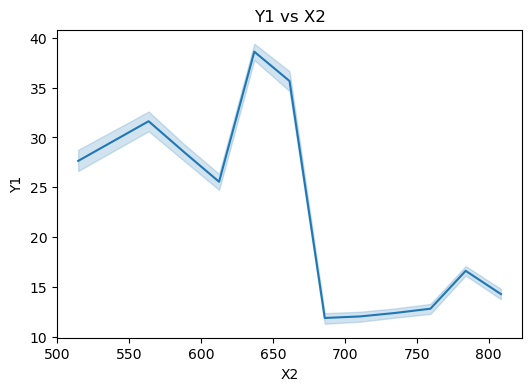

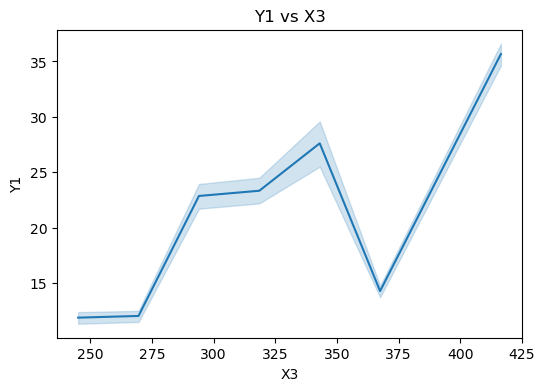

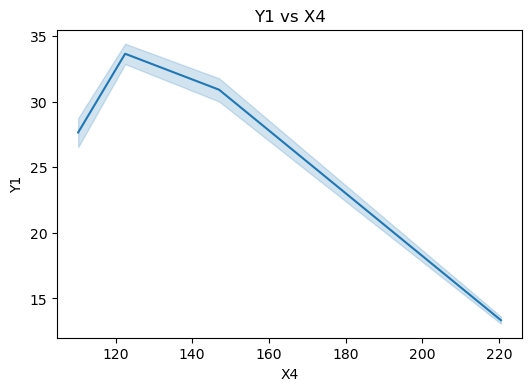

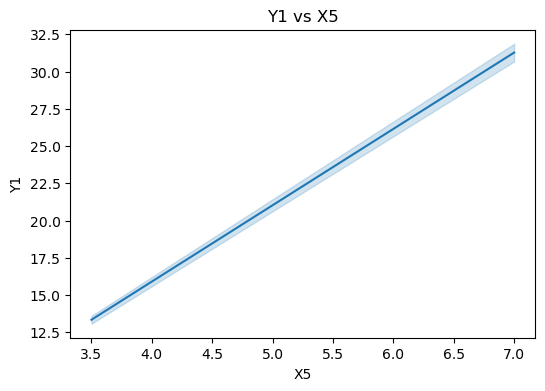

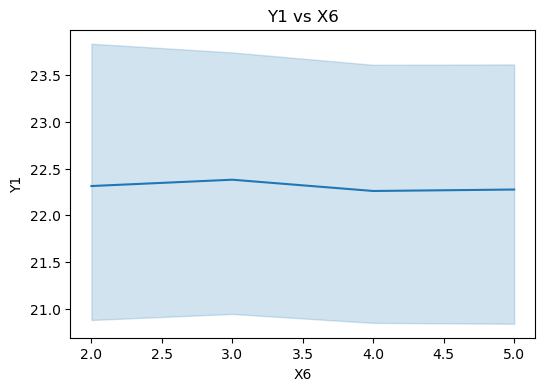

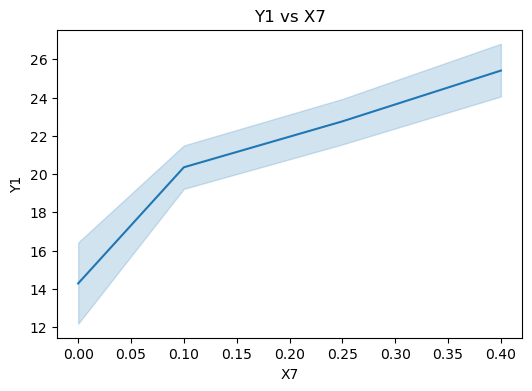

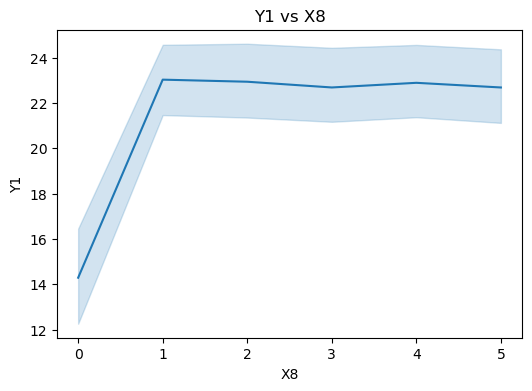

In [15]:
cols = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.lineplot(x=col, y='Y1', data=data)
    plt.title(f'Y1 vs {col}')
    plt.xlabel(col)
    plt.ylabel('Y1')
    plt.show()

<Axes: xlabel='X1', ylabel='Y1'>

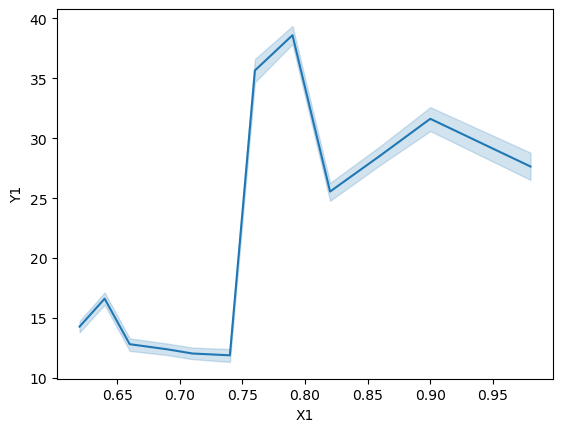

In [29]:
sns.lineplot(data=data,x=data.X1,y=data.Y1)

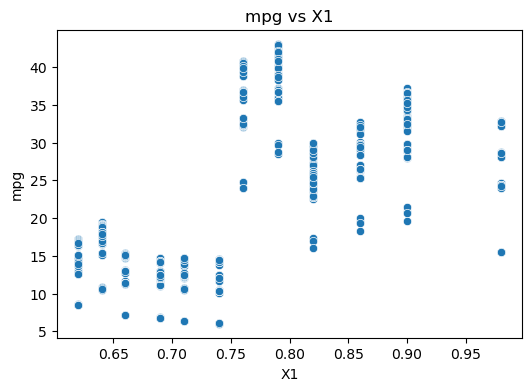

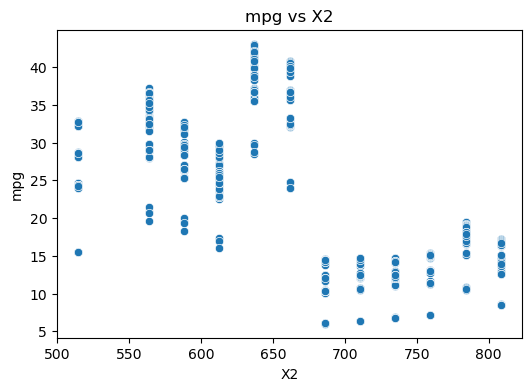

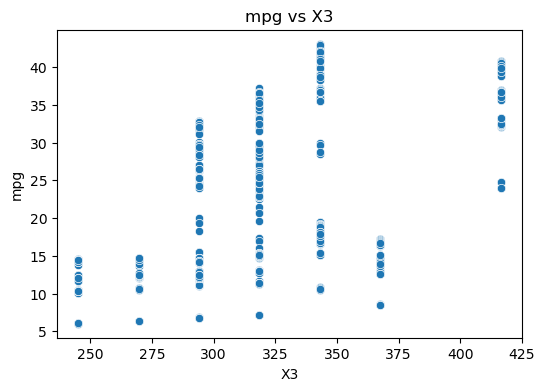

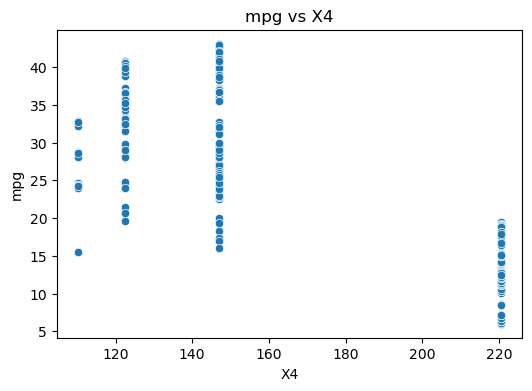

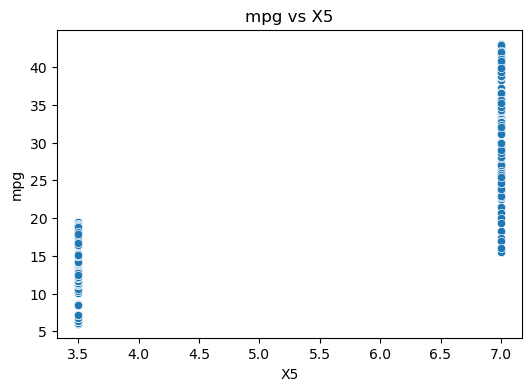

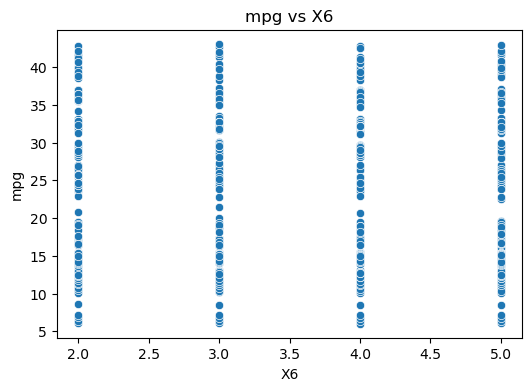

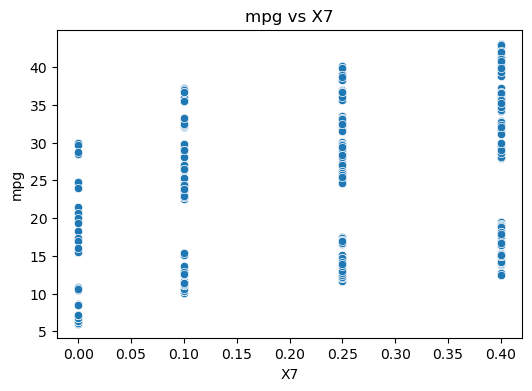

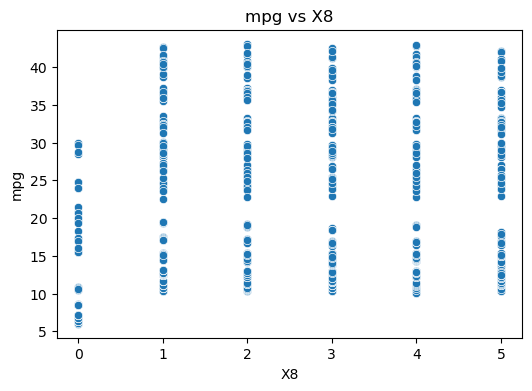

In [31]:
cols = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='Y1', data=data)
    plt.title(f'mpg vs {col}')
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()

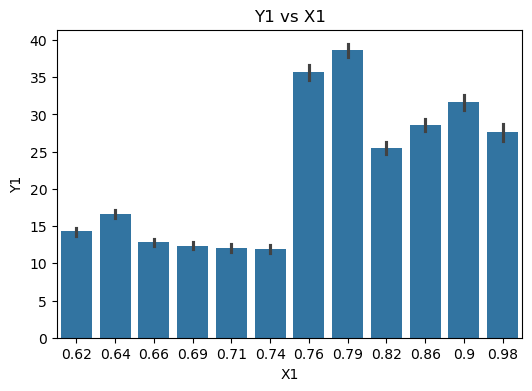

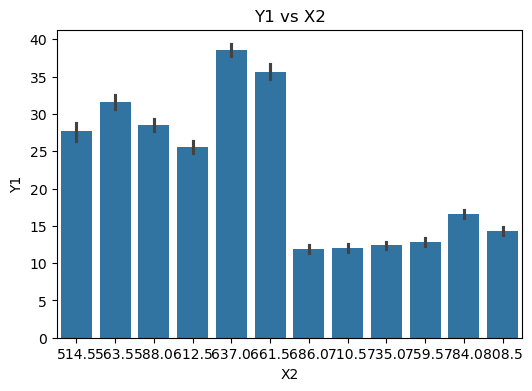

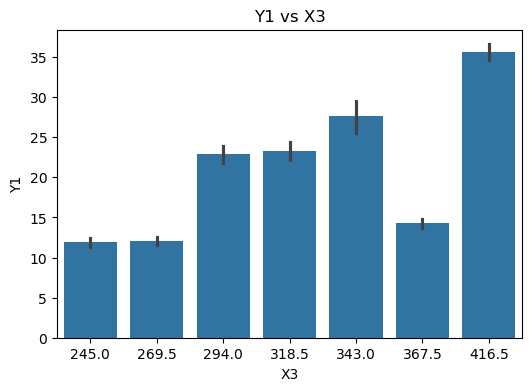

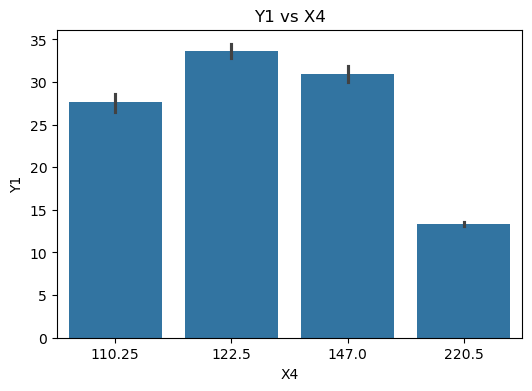

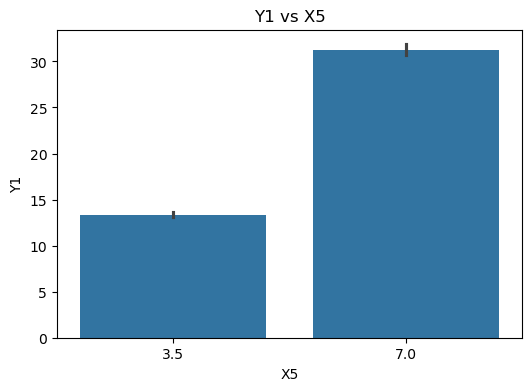

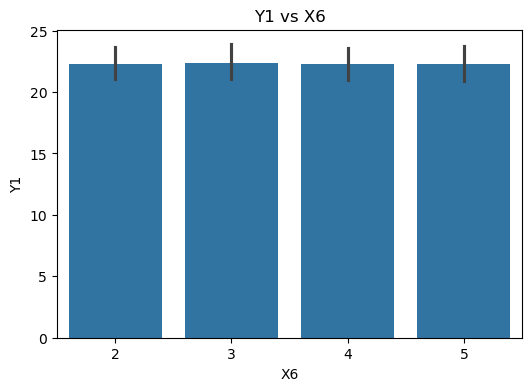

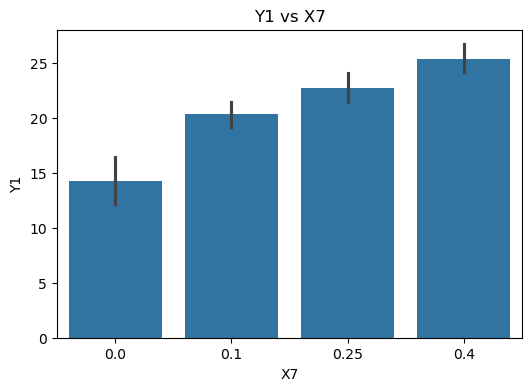

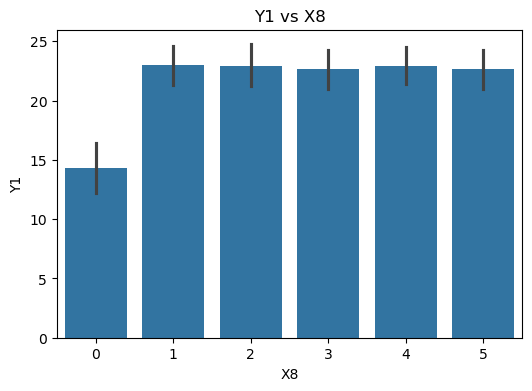

In [17]:
cols = ['X1', 'X2', 'X3', 'X4','X5','X6','X7','X8']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Y1', data=data)
    plt.title(f'Y1 vs {col}')
    plt.xlabel(col)
    plt.ylabel('Y1')
    plt.show()

In [35]:
data1=data.drop(['X6'],axis=1)

In [37]:
ip=data1.drop(['Y1','Y2'],axis=1)

In [39]:
op=data1['Y1']

In [41]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(ip,op,test_size=0.2)


In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
sc.fit(xts)
xtr=sc.transform(xtr)
xts=sc.transform(xts)

In [45]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(xtr,ytr)

LinearRegression()

In [47]:
yp=alg.predict(xts)

In [49]:
print('m is',alg.coef_)
print('c is',alg.intercept_)

m is [-6.89984635 -3.61081317  0.61102185 -3.82908933  7.77134593  2.48936737
  0.31854468]
c is 22.107443781961322


In [51]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(yts,yp)
print(a)
from sklearn.metrics import r2_score
b=r2_score(yts,yp)
print(b)

8.31345311416318
0.9120676309059134
